# Loan Approval Prediction using Random Forest Classifier Algorithm

Citation:

The Loan Approval dataset is provided by: https://www.kaggle.com/

## Problem Definition

The goal of this project is to build a machine learning model that predicts whether a loan application will be approved based on various applicant information such as income, credit history, loan amount, and other relevant features. This will help financial institutions make informed decisions on loan approvals, minimizing the risk of default while improving customer satisfaction.

**Objective**: 
* Accurately predict loan approval using applicant data.
* Identify key features that impact loan approval decisions.
* Improve decision-making for loan officers by automating the approval process with a reliable model.

**Target Variable**: The target variable is the `loan_status`.

#### Importing Required Libraries

In [981]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  

## Dataset Creation

In [982]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


Make a copy of the dataset

In [983]:
df_copy = df.copy()
df_copy.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


Set the `loan_id` column as the index column.

In [984]:
df_copy = df_copy.set_index('loan_id')
df_copy.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


#### Initial Data Preprocessing

* Looking at the Data Structure: info(), describe(), value_counts()
* Handling missing values
* Removing duplicates
* Converting categorical data into numerical form 
* Basic feature selection (removing irrelevant columns)

In [985]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB


In [986]:
df_copy.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [987]:
df_copy[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [988]:
df_copy[' self_employed'].value_counts()

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [989]:
df_copy[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Let's check class imbalance by calculating the ratio of the two classes.

In [990]:
class_counts = df_copy[' loan_status'].value_counts()

class_0_count = class_counts.iloc[0]
class_1_count = class_counts.iloc[1]

ratio = class_0_count / class_1_count
print(f"Ratio of {class_counts.index[0]} to {class_counts.index[1]}: {ratio:.2f}")

class_percentages = df[' loan_status'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percentages)

Ratio of  Approved to  Rejected: 1.65

Class Percentages:
 loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


The classes tend to be moderately imbalanced.

We can observe from the column names that there are whitespaces inbetween the quotation marks and the names. Lets strip out the whitespaces.

In [991]:
for column_name in df_copy.columns:
    df_copy.rename(columns={column_name: column_name.strip()}, inplace=True)

df_copy.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

Remove leading and trailing whitespaces from each string in the categorical columns

In [992]:
cat_columns = df_copy.select_dtypes(include=['object']).columns

for col in cat_columns:
    df_copy[col] = df_copy[col].str.strip()

for col in cat_columns:
    print(df_copy[col].unique())

['Graduate' 'Not Graduate']
['No' 'Yes']
['Approved' 'Rejected']


In [993]:
df_copy[df_copy.duplicated()].any()

no_of_dependents            False
education                   False
self_employed               False
income_annum                False
loan_amount                 False
loan_term                   False
cibil_score                 False
residential_assets_value    False
commercial_assets_value     False
luxury_assets_value         False
bank_asset_value            False
loan_status                 False
dtype: bool

Convert the `Approved` and `Rejected` values in the `loan_status` target to `1 and 0`.

In [994]:
df_copy['loan_status'] = [1 if status == 'Approved' else 0 for status in df_copy['loan_status']]
df_copy['loan_status'].unique()

array([1, 0], dtype=int64)

#### Exploratory Data Analysis (EDA)

* Visualize the data using histograms, scatter plots, box-plots etc.
* Identify `patterns, relationships, or outliers` in the data.
* Understand the `distribution of features, correlations, redundancy and multicollinearity` etc.
* Check for class imbalace.
* Feature engineering might be done based on insights from EDA (e.g., creating new features or transforming existing ones).

Let's visualize box-plots for outliers.

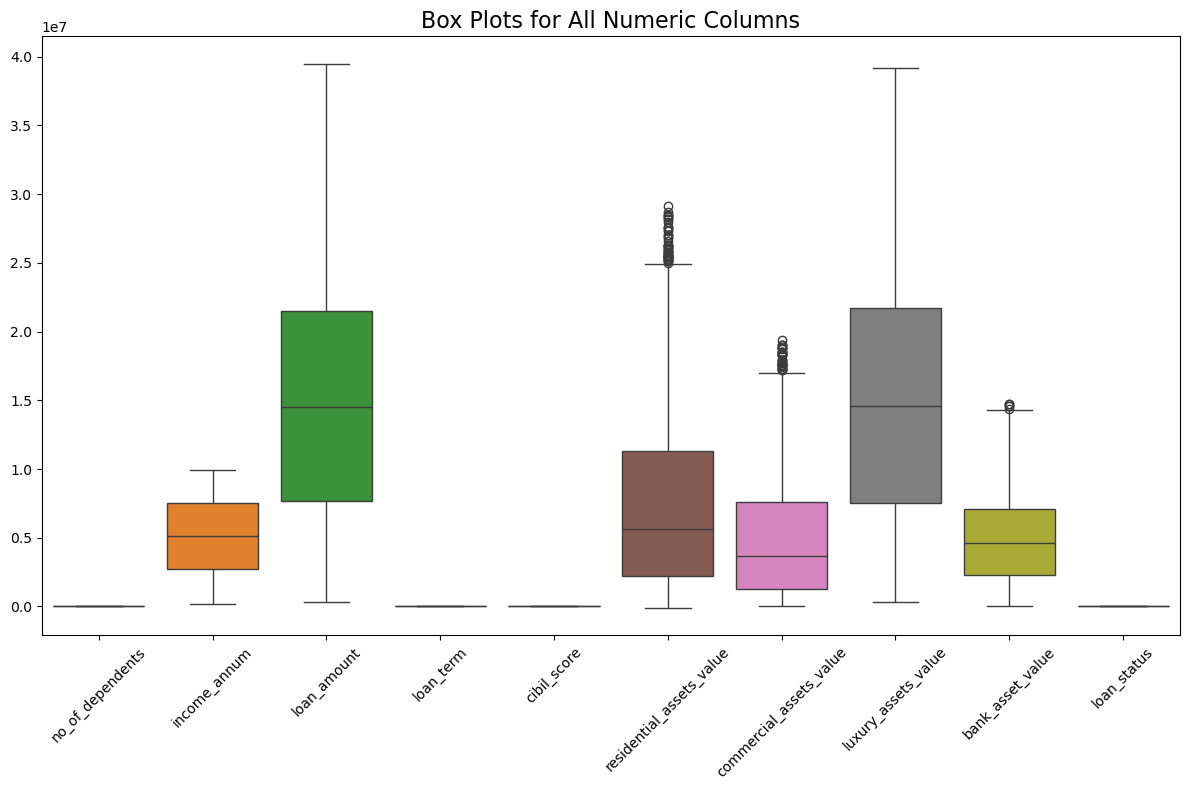

In [995]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_copy.select_dtypes(include=['float', 'int64']))
plt.title('Box Plots for All Numeric Columns', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualizing the distribution of all numeric features

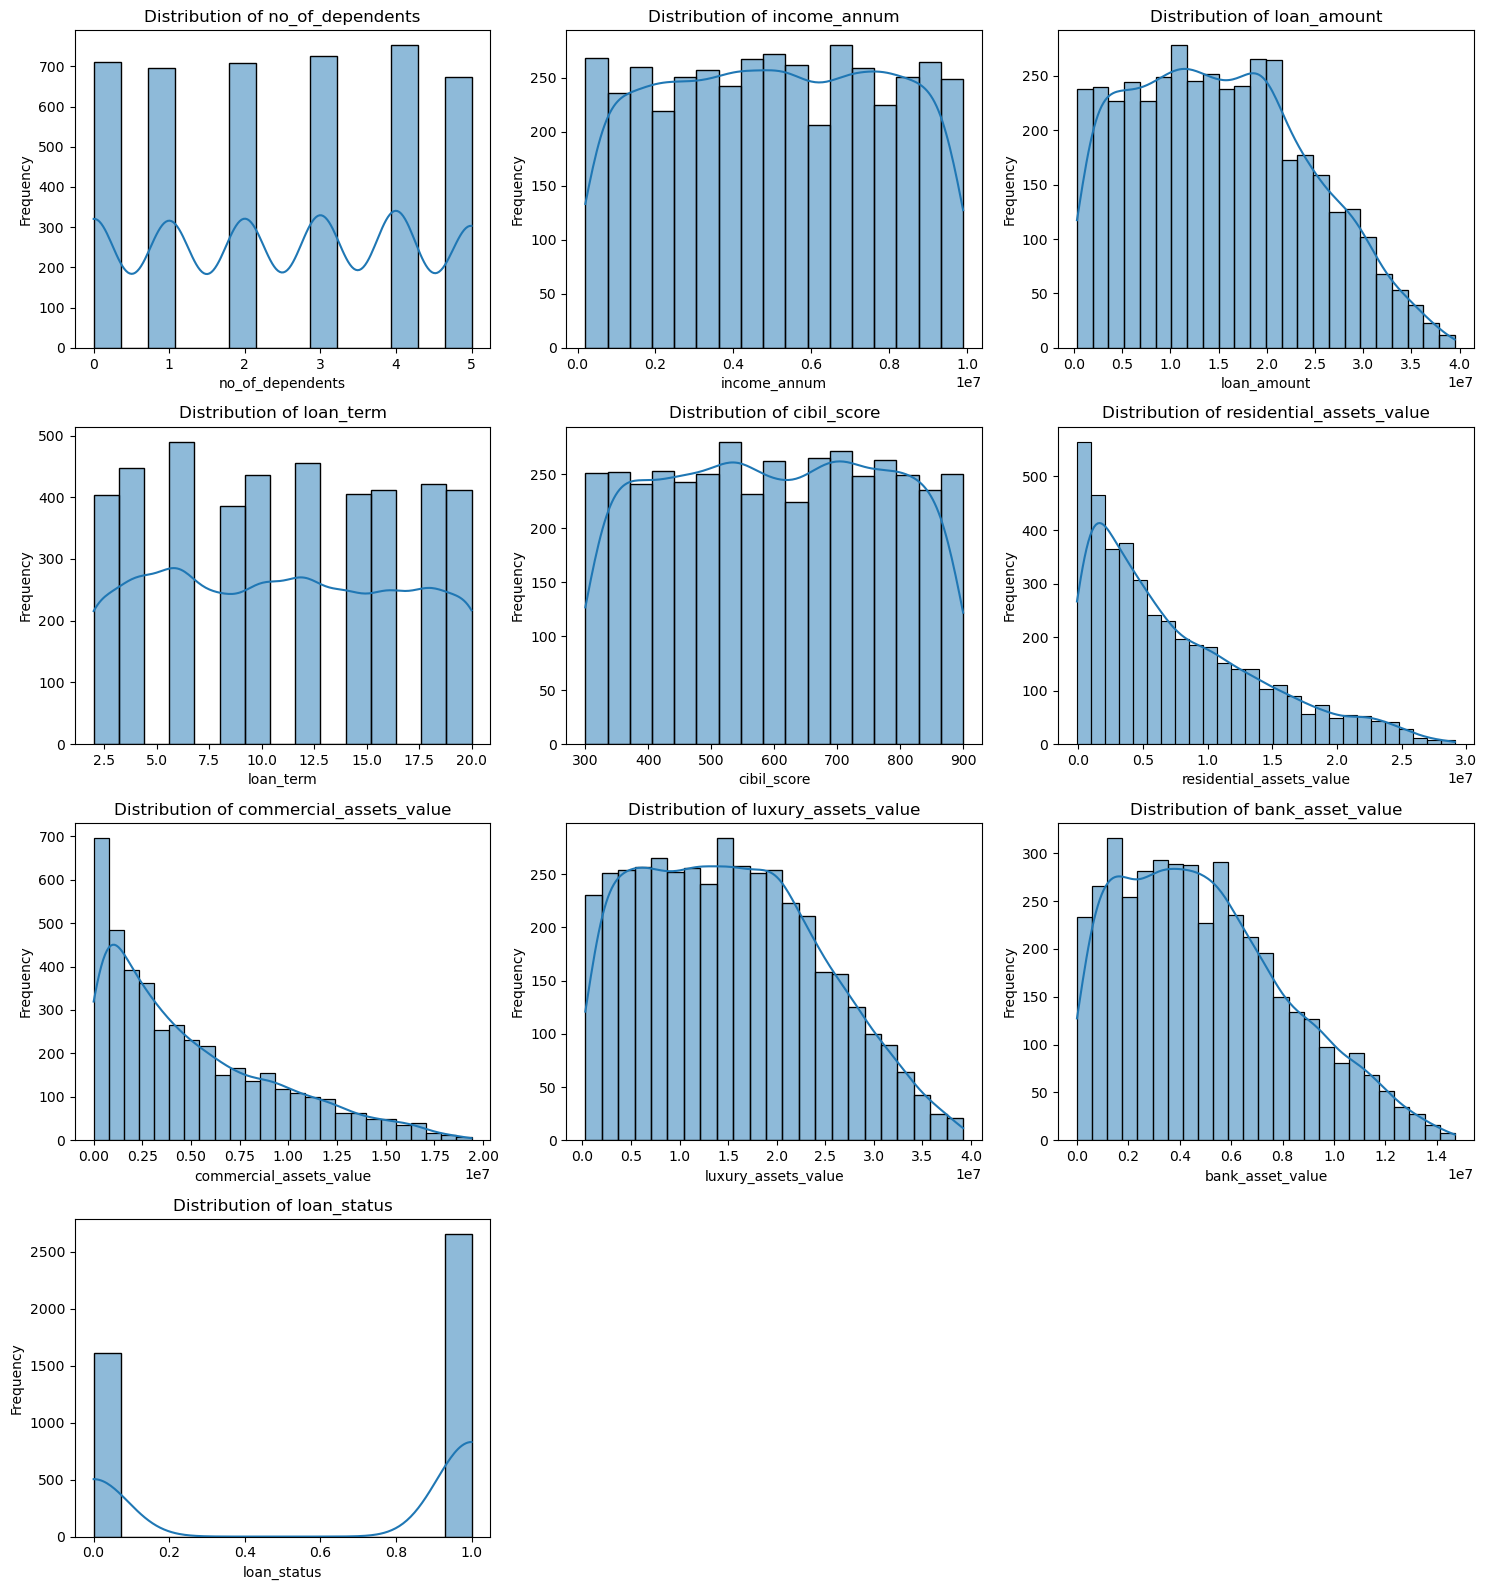

In [996]:

numeric_columns = df_copy.select_dtypes(include=['number']).columns

n_cols = 3 
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_copy[column], kde=True)  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Look out for correlations, redundancy and multicollinearity.

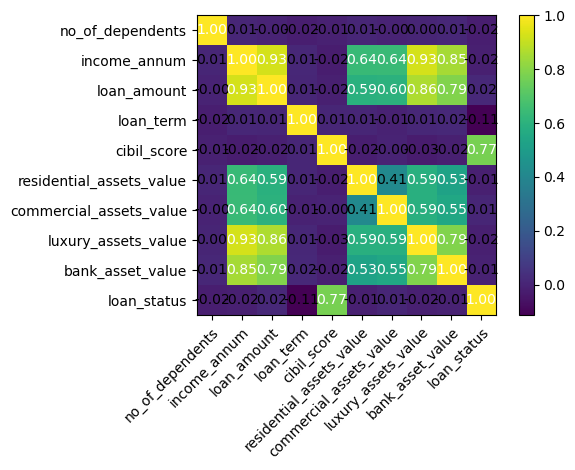

In [997]:
import numpy as np
from mlxtend.plotting import heatmap

df_num = df_copy.select_dtypes(include='number')
cm = np.corrcoef(df_num.values.T)
hm = heatmap(cm, row_names=df_num.columns, column_names=df_num.columns)

plt.tight_layout()
plt.show()

Some feature pairs are `highly correlated`. We will handle that in the evaluation and optimization stages.

#### Further Preprocessing

* Dealing with `outliers` found during EDA.
* Feature engineering
* Scaling/normalizing and creating pipeline.

Our box plots show that some pairs have outliers. Let us see the pairs and the number of outliers cointained.

In [998]:
num_col = df_copy.select_dtypes(include=['number']).columns

for col in num_col:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)].shape[0]
    print(f"Number of outliers in {col}: {num_outliers}")

    # Use `Imputation` to replace outlier values with the median of the non-outlier values.
    if num_outliers > 0:
        median_column = df_copy[col].median()
        df_copy.loc[df_copy[col] > upper_bound, col] = median_column


Number of outliers in no_of_dependents: 0
Number of outliers in income_annum: 0
Number of outliers in loan_amount: 0
Number of outliers in loan_term: 0
Number of outliers in cibil_score: 0
Number of outliers in residential_assets_value: 52
Number of outliers in commercial_assets_value: 37
Number of outliers in luxury_assets_value: 0
Number of outliers in bank_asset_value: 5
Number of outliers in loan_status: 0


Create Transformation Pipelines for both numeric and categorical input features. 

In [999]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Create a pipeline for numerical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

# Create a pipeline for categorical attributes
cat_pipeline = Pipeline([   
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

num_input_attribs = df_copy.select_dtypes(include=['int64', 'float64'])
num_attribs = num_input_attribs.drop('loan_status', axis=1).columns # Drop the target variable
cat_attribs = df_copy.select_dtypes(include=['object', 'category']).columns

# Combine the numerical and categorical pipelines using ColumnTransformer
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

#### Train-Test Split

* Splitting the dataset into training and test sets.
* Training set: 70-80% of the dataset
* Testing set: 20-30% of the dataset.

In [1000]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('loan_status', axis=1)
y = df_copy['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [1001]:
X_train_std = preprocess_pipeline.fit_transform(X_train)
X_train_std

array([[-1.47742551, -0.09263172,  0.27213303, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.2959599 ,  0.97410867,  1.25582537, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.88708838,  0.54741252,  1.15522047, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.29516857,  0.29850643, -0.11910824, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88708838, -0.55488589, -0.62213273, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.2959599 ,  1.3296888 ,  0.59630437, ...,  0.        ,
         1.        ,  0.        ]])

For a better view of out tansformed features let's use dataframe.

In [1002]:
def get_feature_names(data):
    df_prepared = pd.DataFrame(
        data,
        columns=preprocess_pipeline.get_feature_names_out(),
        index=X_train.index)
    return df_prepared

df_prepared = get_feature_names(X_train_std)
df_prepared.head(5)

,num__no_of_dependents,num__income_annum,num__loan_amount,num__loan_term,num__cibil_score,num__residential_assets_value,num__commercial_assets_value,num__luxury_assets_value,num__bank_asset_value,cat__education_Graduate,cat__education_Not Graduate,cat__self_employed_No,cat__self_employed_Yes
loan_id,,,,,,,,,,,,,
170,-1.477426,-0.092632,0.272133,-1.546896,-1.324972,0.759118,0.473955,0.386753,-0.454236,0.0,1.0,0.0,1.0
1037,0.295960,0.974109,1.255825,1.583211,1.388752,-0.972341,1.554860,0.976437,0.104076,1.0,0.0,0.0,1.0
4136,0.887088,0.547413,1.155220,0.192053,0.127362,0.346866,-0.318709,0.517793,0.786459,0.0,1.0,1.0,0.0
3416,0.295960,-1.621626,-1.460507,0.192053,1.678061,-1.038301,-0.991272,-1.458740,-1.415775,1.0,0.0,1.0,0.0
1779,-0.295169,-1.230488,-1.158692,0.192053,-0.104086,-0.922871,-0.847151,-1.087457,-1.229671,1.0,0.0,0.0,1.0


In [1003]:
y_train

loan_id
170     1
1037    1
4136    1
3416    1
1779    1
       ..
731     0
1387    0
1174    1
4186    1
273     0
Name: loan_status, Length: 2988, dtype: int64

## Model Selection 

In [1004]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(preprocess_pipeline, 
                         RandomForestClassifier())  

## Model Training

* Train a basic model without tuning any hyperparameters to establish a `baseline performance`.
* Fit the model to the entire training set

In [1005]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['education', 'self_employed'], dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

## Model Assesment

* Evaluate on both training and test set.
* Cross-validation to evaluate model performance.
* Compare `training accuracy` and `test accuracy` to detect `overfitting or underfitting`.
* Compare `test accuracy` and `cross-validation scores` to provide `better measures of generalization`.
* Evaluate Initial Model: Generate and examine the `classification report`.
* Plot and visualize `learning curves`.

Since the class moderately imbalanced, we will precision, recall or f1_score for evaluation.

In [1006]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate

# 1. StratifiedKFold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics: Precision, Recall, and F1
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# 2. Train predictions and evaluation using Precision, Recall, and F1
y_train_pred = pipeline.predict(X_train)

# Calculate precision, recall, and f1 for training data
training_precision = precision_score(y_train, y_train_pred)
training_recall = recall_score(y_train, y_train_pred)
training_f1 = f1_score(y_train, y_train_pred)

# Print training metrics
print(f'Training Precision: {training_precision:.4f}')
print(f'Training Recall: {training_recall:.4f}')
print(f'Training F1 Score: {training_f1:.4f}')

# 3. Cross-Validation using StratifiedKFold and multiple metrics
cv_results = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring, return_train_score=False)

# Print cross-validation metrics
print("\nCross-Validation Results:")
print(f"Mean Cross-Validation Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Cross-Validation Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean Cross-Validation F1 Score: {cv_results['test_f1'].mean():.4f}")

# 4. Test predictions and evaluation using Precision, Recall, and F1
y_test_pred = pipeline.predict(X_test)

# Calculate precision, recall, and f1 for test data
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print test metrics
print("\nTest Results:")
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

# 5. Overfitting and Generalization Check
if training_f1 > cv_results['test_f1'].mean() and training_f1 > test_f1:
    print("\nOverfitting Detected: The model performs much better on training data than on validation or test data.")
elif test_f1 > cv_results['test_f1'].mean():
    print("\nUnderfitting Detected: The model performs better on test data than on validation.")
else:
    print("\nModel is Generalizing Well: Consistent performance on training, validation, and test data.")

# 6. Optional: Detailed Classification Report for the test set
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Training Precision: 1.0000
Training Recall: 1.0000
Training F1 Score: 1.0000

Cross-Validation Results:
Mean Cross-Validation Precision: 0.9786
Mean Cross-Validation Recall: 0.9801
Mean Cross-Validation F1 Score: 0.9793

Test Results:
Test Precision: 0.9875
Test Recall: 0.9887
Test F1 Score: 0.9881

Overfitting Detected: The model performs much better on training data than on validation or test data.

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       484
           1       0.99      0.99      0.99       797

    accuracy                           0.99      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.99      0.99      0.99      1281



## Model Optimization

* Use `GridSearchCV` or `RandomSearchCV` to find the optimal combination of hyperparameters.
* Evaluate final Model: Generate and examine the `classification report`.
* After hyperparameter tuning, use `confusion matrix` to assess the model’s performance to ensure that it generalizes well to new, unseen data.


In [1008]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [10, 20, None],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__class_weight': ['balanced', None]  
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring='f1', cv=skf, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score from Grid Search:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred_best = best_rf_model.predict(X_test)
print("Test F1 Score after tuning:", f1_score(y_test, y_pred_best))
print("Classification Report after tuning:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Best F1 Score from Grid Search: 0.982261726245199
Test F1 Score after tuning: 0.9861635220125786
Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       484
           1       0.99      0.98      0.99       797

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



Even though the model is generalizing well on unseen data, we should see the feature importances.

In [1011]:
preprocessor = preprocess_pipeline.fit(X_train)

feature_names = preprocessor.get_feature_names_out()

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_std, y_train)

importances = rf_classifier.feature_importances_

assert len(feature_names) == len(importances), "Feature names and importances lengths do not match!"

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


                          Feature  Importance
4                num__cibil_score    0.784133
3                  num__loan_term    0.056861
2                num__loan_amount    0.031982
7        num__luxury_assets_value    0.022096
5   num__residential_assets_value    0.022071
1               num__income_annum    0.021144
6    num__commercial_assets_value    0.020737
8           num__bank_asset_value    0.020735
0           num__no_of_dependents    0.010713
9         cat__education_Graduate    0.002421
11          cat__self_employed_No    0.002400
10    cat__education_Not Graduate    0.002378
12         cat__self_employed_Yes    0.002330
